In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
wine = pd.read_csv('winequality-red.csv')
df = wine.copy()
df1 = df.drop_duplicates()

# 이상치 처리

In [7]:
# 각 열에 대한 임계값 및 상한값 딕셔너리 정의
criteria = {
    'fixed acidity': 12.9,
    'volatile acidity': 1.04,
    'residual sugar': 6.6,
    'total sulfur dioxide': 149.0,
    'sulphates': 1.09
}

In [8]:
# 산점도를 그릴 열 선택
selected_columns = ['fixed acidity', 'volatile acidity', 'residual sugar',
                    'total sulfur dioxide', 'sulphates']

# 각 열에 대해 반복
for column_name in selected_columns:
    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 임계값 및 상한값 지정
    threshold = criteria[column_name]

    # 이상치에 해당하는 데이터 선택
    red_points = df1[df1[column_name] > threshold]

    # 이상치를 중앙값으로 대체
    df1.loc[red_points.index, column_name] = df1[column_name].median()
    

In [9]:
import matplotlib.pyplot as plt

# 선택할 열들
selected_columns = ['citric acid', 'free sulfur dioxide', 'alcohol']

# 반복문으로 각 열에 대한 이상치를 중앙값으로 대체하고 산점도 그리기
for column_name in selected_columns:
    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 특정 조건에 맞는 데이터 선택
    red_points = df1[df1[column_name] > upper_bound]
    blue_points = df1[df1[column_name] <= upper_bound]

    # 이상치를 중앙값으로 대체
    df1.loc[red_points.index, column_name] = df1[column_name].median()

In [10]:
# pH

import matplotlib.pyplot as plt

# 선택한 열
column_name = 'pH'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# 특정 조건에 맞는 데이터 선택
red_points = df1[(df1[column_name] < 2.86) | (df1[column_name] > 3.75)]
green_points = df1[(df1[column_name] > upper_bound) & (df1[column_name] <= 3.75) & (df1[column_name] >= 2.86)]
blue_points = df1[(df1[column_name] <= upper_bound) & (df1[column_name] >= lower_bound)]

# 중앙값으로 이상치 대체
df1.loc[red_points.index, column_name] = df1[column_name].median()


In [11]:
# density

import matplotlib.pyplot as plt

# 선택한 열
column_name = 'density'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# 특정 조건에 맞는 데이터 선택
red_points = df1[(df1[column_name] < 0.9912) | (df1[column_name] > 1.0022)]
green_points = df1[(df1[column_name] >= 0.9912) & (df1[column_name] <= upper_bound) & (df1[column_name] <= 1.0022)]
blue_points = df1[(df1[column_name] <= upper_bound) & (df1[column_name] >= lower_bound)]

# 중앙값으로 이상치 대체
df1.loc[red_points.index, column_name] = df1[column_name].median()

In [12]:
import matplotlib.pyplot as plt

# 선택한 열
column_name = 'chlorides'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 특정 조건에 맞는 데이터 선택
red_points = df1[df1[column_name] > 0.34]
green_points = df1[(df1[column_name] <= 0.038) | ((df1[column_name] >= 0.123) & (df1[column_name] <= 0.337))]
blue_points = df1[(df1[column_name] >= lower_bound) & (df1[column_name] <= upper_bound)]

# 중앙값으로 이상치 대체
df1.loc[red_points.index, column_name] = df1[column_name].median()

In [13]:
df2 = df1.copy()

In [14]:
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 왜도 & 첨도 총정리

# 차례
- 1. 왜도 & 첨도 계산
- 2. 왜도 & 첨도 판단
- 2.1 boxcox 변환
- 2.2 제곱근 변환
- 2.3 로그 변환
- 3. 왜도 & 첨도 변환
- 3.1 boxcox 변환 (전체)
- 3.2 제곱근 변환 (volatile acidity)
- 3.3 boxcox & 제곱근(alcohol)

#  1. 왜도 & 첨도 계산 (처리 전)

# 개념
- 왜도 : 데이터 분포의 비대칭 정도를 측정. 왜도가 0보다 크면 분포가 오른쪽으로 치우쳐져 있고, 0보다 작으면 왼쪽으로 치우쳐져 있다.
- 첨도 : 데이터 분포의 꼬리의 두께와 중앙 부분의 뾰족함을 측정함. 정규분포의 첨도는 3이고, 이보다 크면 꼬리가 두껍고, 작으면 꼬리가 얇다. 이론적으로 첨도가 3에 가까울수록 데이터가 정규분포에 가깝다고 할 수 있다. (첨도는 0에 더 가깝냐 3에 더 가깝냐 두개로 나뉘는데 두개의 차이는 원래 첨도 식(+3)에서 -3 한것이 0이 되었다. 즉, 파이썬에서는 3을 빼준식으로 적용을 했기에 0에 더 가까운걸 찾으면 된다.)

=== 왜도 결과 ===
fixed acidity           0.690510
volatile acidity        0.408120
citric acid             0.287387
residual sugar          2.363971
chlorides               3.432842
free sulfur dioxide     0.790797
total sulfur dioxide    1.122658
density                -0.027257
pH                      0.028089
sulphates               0.871487
alcohol                 0.740082
dtype: float64

=== 첨도 결과 ===
fixed acidity            0.133181
volatile acidity        -0.148819
citric acid             -0.884578
residual sugar           6.854727
chlorides               19.049222
free sulfur dioxide     -0.146034
total sulfur dioxide     0.722018
density                  0.280832
pH                       0.082224
sulphates                0.709980
alcohol                 -0.298483
dtype: float64


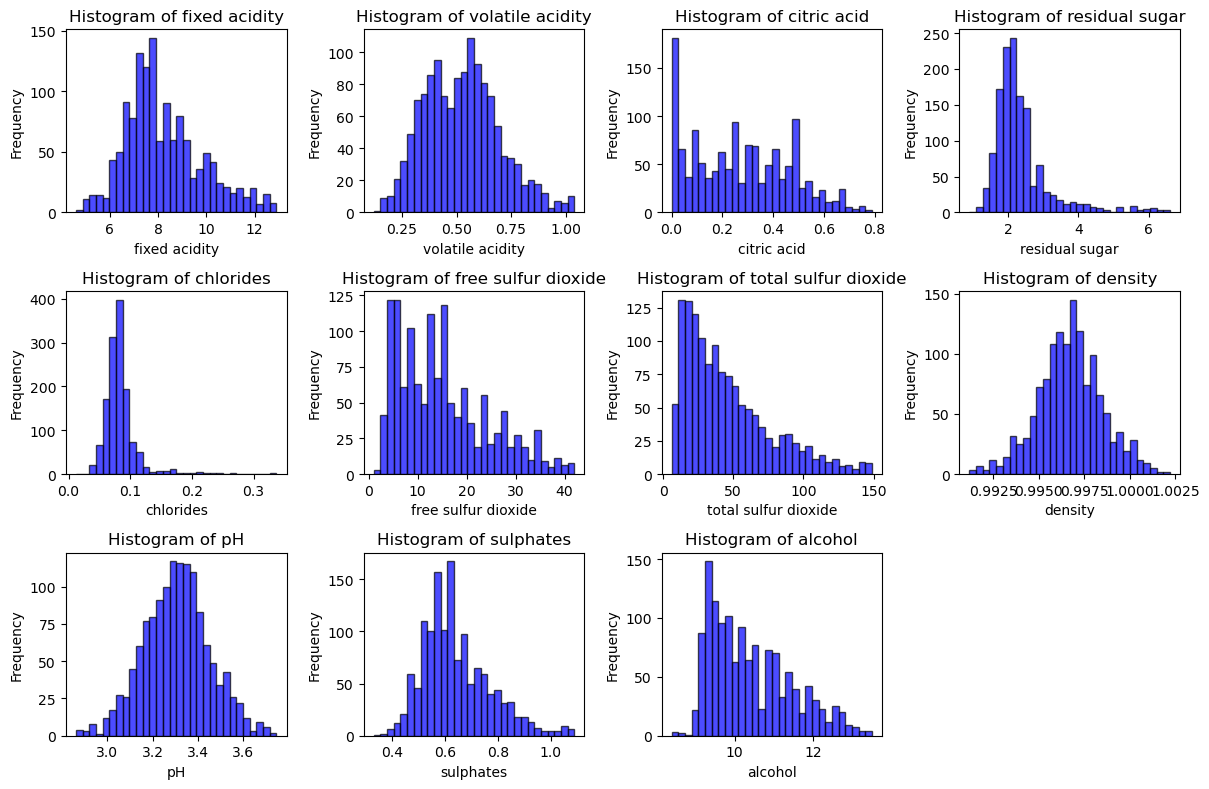

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 'df2'는 이상치를 대체한 데이터프레임 이름입니다. 실제 데이터프레임의 이름에 따라 수정해야 합니다.
df2_A = df2.drop('quality', axis=1)  # 'quality' 열을 제외한 변수만 포함하는 새로운 데이터프레임 생성

# 왜도와 첨도 계산
왜도_결과 = df2_A.skew()
첨도_결과 = df2_A.kurtosis()

# 결과 출력
print("=== 왜도 결과 ===")
print(왜도_결과)

print("\n=== 첨도 결과 ===")
print(첨도_결과)

# 히스토그램 그리기
plt.figure(figsize=(12, 8))

for idx, column in enumerate(df2_A.columns):
    plt.subplot(3, 4, idx + 1)
    plt.hist(df2_A[column], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


* 왜도 결과
- fixed acidity (고정 산도): 양수의 왜도가 나타남으로써 오른쪽으로 치우친 분포를 나타냄.
- volatile acidity (휘발성 산도): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- citric acid (구연산): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- residual sugar (잔류 설탕): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- chlorides (염화물): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- free sulfur dioxide (자유 이산화황): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- total sulfur dioxide (총 이산화황): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- density (밀도): 왜도가 거의 0에 가깝기 때문에 비교적 대칭에 가까운 분포를 나타냄.
- pH (산도): 왜도가 거의 0에 가깝기 때문에 비교적 대칭에 가까운 분포를 나타냄.
- sulphates (황산염): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- alcohol (알코올): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
------------------------------------------------------------------------------
* 첨도 결과:
- fixed acidity (고정 산도): 첨도가 양수이므로 뾰족한 꼬리를 가진 분포를 나타냄.
- volatile acidity (휘발성 산도): 첨도가 음수이므로 꼬리가 두툼한 분포를 나타냄.
- citric acid (구연산): 첨도가 음수이므로 꼬리가 두툼한 분포를 나타냄.
- residual sugar (잔류 설탕): 첨도가 양수이므로 뾰족한 꼬리를 가진 분포를 나타냄.
- chlorides (염화물): 매우 높은 양수의 첨도로 뾰족한 꼬리를 가진 분포를 나타냄.
- free sulfur dioxide (자유 이산화황): 첨도가 음수이므로 꼬리가 두툼한 분포를 나타냄.
- total sulfur dioxide (총 이산화황): 첨도가 양수이므로 뾰족한 꼬리를 가진 분포를 나타냄.
- density (밀도): 첨도가 양수이므로 뾰족한 꼬리를 가진 분포를 나타냄.
- pH (산도): 첨도가 양수이므로 뾰족한 꼬리를 가진 분포를 나타냄.
- sulphates (황산염): 첨도가 양수이므로 뾰족한 꼬리를 가진 분포를 나타냄.
- alcohol (알코올): 첨도가 음수이므로 꼬리가 두툼한 분포를 나타냄.

# 2. 왜도 & 첨도 판단

# 2.1 boxcox 변환

- 주의할 점 : boxcox 변환은 양의 값을 갖는 데이터에 적합하며, 0이하의 값이 있는 경우에는 1을 더하여 변환한다.(critic acid)

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import boxcox

# 데이터프레임 생성
# df1 = ...

# 'quality' 열 제외
df2_A = df2.drop('quality', axis=1)

# 'citric acid'에 1e-6 추가
df2_A['citric acid'] += 1e-6

# Box-Cox 변환 수행
df2_A_boxcox = pd.DataFrame()
for column in df2_A.columns:
    # Box-Cox 변환
    transformed_data, lambda_value = boxcox(df2_A[column])
    df2_A_boxcox[column] = transformed_data

# 각 열에 대해 왜도와 첨도 계산
skewness_result_before = df2_A.skew()
kurtosis_result_before = df2_A.kurtosis()
skewness_result_after = df2_A_boxcox.skew()
kurtosis_result_after = df2_A_boxcox.kurtosis()

# 결과 출력
print("=== 왜도 결과 (Box-Cox 변환 전 vs. 후) ===")
comparison_skewness = pd.DataFrame({
    'Before Transformation': skewness_result_before,
    'After Transformation': skewness_result_after
})
print(comparison_skewness)

print("\n=== 첨도 결과 (Box-Cox 변환 전 vs. 후) ===")
comparison_kurtosis = pd.DataFrame({
    'Before Transformation': kurtosis_result_before,
    'After Transformation': kurtosis_result_after
})
print(comparison_kurtosis)


=== 왜도 결과 (Box-Cox 변환 전 vs. 후) ===
                      Before Transformation  After Transformation
fixed acidity                      0.690510              0.002815
volatile acidity                   0.408120             -0.021598
citric acid                        0.287387             -0.814111
residual sugar                     2.363971             -0.062453
chlorides                          3.432842             -0.173657
free sulfur dioxide                0.790797             -0.038509
total sulfur dioxide               1.122658             -0.014487
density                           -0.027257              0.000911
pH                                 0.028089              0.000997
sulphates                          0.871487              0.002571
alcohol                            0.740082              0.106919

=== 첨도 결과 (Box-Cox 변환 전 vs. 후) ===
                      Before Transformation  After Transformation
fixed acidity                      0.133181             -0.071655
volat

# 2.2 제곱근 변환

- 이 코드는 먼저 원본 데이터에 대한 왜도와 첨도를 출력하고, 그 다음 제곱근 변환을 적용한 후의 왜도와 첨도를 출력합니다. 또한 변환 전과 후의 히스토그램을 시각적으로 비교합니다.

- 제곱근 변환은 양수의 왜도를 갖는 데이터를 상당히 정규분포에 가깝게 만들 수 있는 간단한 방법 중 하나입니다. 그러나 데이터의 특성에 따라 다른 변환을 사용하는 것이 더 적합할 수 있습니다.

In [17]:
import matplotlib.pyplot as plt
import pandas as pd


df2_A = df2.drop('quality', axis=1)  # 'quality' 열을 제외한 변수만 포함하는 새로운 데이터프레임 생성


df2_A_sqrt = df2_A.apply(lambda x: x**0.5)  # 제곱근 변환

# 각 열에 대해 왜도와 첨도 계산
skewness_result_before = df2_A.skew()
kurtosis_result_before = df2_A.kurtosis()
skewness_result_after = df2_A_sqrt.skew()
kurtosis_result_after = df2_A_sqrt.kurtosis()

# 결과 출력
print("=== 왜도 결과 (제곱근 변환 전 vs. 후) ===")
comparison_skewness = pd.DataFrame({
    'Before Transformation': skewness_result_before,
    'After Transformation': skewness_result_after
})
print(comparison_skewness)

print("\n=== 첨도 결과 (제곱근 변환 전 vs. 후) ===")
comparison_kurtosis = pd.DataFrame({
    'Before Transformation': kurtosis_result_before,
    'After Transformation': kurtosis_result_after
})
print(comparison_kurtosis)

=== 왜도 결과 (제곱근 변환 전 vs. 후) ===
                      Before Transformation  After Transformation
fixed acidity                      0.690510              0.453425
volatile acidity                   0.408120              0.002380
citric acid                        0.287387             -0.552845
residual sugar                     2.363971              1.731040
chlorides                          3.432842              2.047429
free sulfur dioxide                0.790797              0.274546
total sulfur dioxide               1.122658              0.517002
density                           -0.027257             -0.030283
pH                                 0.028089             -0.042168
sulphates                          0.871487              0.603889
alcohol                            0.740082              0.659052

=== 첨도 결과 (제곱근 변환 전 vs. 후) ===
                      Before Transformation  After Transformation
fixed acidity                      0.133181             -0.089391
volatile acid

# 2.3 로그 변환

- 주의할 점 : 0이하의 값이 있는 경우에는 1을 더하여 변환한다.(critic acid)

In [18]:
import numpy as np
import pandas as pd

df2_A = df2.drop('quality', axis=1)  # 'quality' 열을 제외한 변수만 포함하는 새로운 데이터프레임 생성

df2_A_log = df2_A.apply(lambda x: np.log1p(x))  # 로그 변환

# 각 열에 대해 왜도와 첨도 계산
skewness_result_before = df2_A.skew()
kurtosis_result_before = df2_A.kurtosis()
skewness_result_after = df2_A_log.skew()
kurtosis_result_after = df2_A_log.kurtosis()

# 결과 출력
print("=== 왜도 결과 (로그 변환 전 vs. 후) ===")
comparison_skewness = pd.DataFrame({
    'Before Transformation': skewness_result_before,
    'After Transformation': skewness_result_after
})
print(comparison_skewness)

print("\n=== 첨도 결과 (로그 변환 전 vs. 후) ===")
comparison_kurtosis = pd.DataFrame({
    'Before Transformation': kurtosis_result_before,
    'After Transformation': kurtosis_result_after
})
print(comparison_kurtosis)

=== 왜도 결과 (로그 변환 전 vs. 후) ===
                      Before Transformation  After Transformation
fixed acidity                      0.690510              0.260592
volatile acidity                   0.408120              0.138489
citric acid                        0.287387              0.068019
residual sugar                     2.363971              1.438817
chlorides                          3.432842              3.106219
free sulfur dioxide                0.790797             -0.193891
total sulfur dioxide               1.122658             -0.078491
density                           -0.027257             -0.030277
pH                                 0.028089             -0.079822
sulphates                          0.871487              0.656345
alcohol                            0.740082              0.593282

=== 첨도 결과 (로그 변환 전 vs. 후) ===
                      Before Transformation  After Transformation
fixed acidity                      0.133181             -0.161114
volatile acidit

- 1. 판단 방법: 왜도 값이 0에 가까운걸 찾는다 / 첨도 결과 값이 0에 가까운걸 찾는다 / 2개의 결과를 비교하여 왜도 첨도 변환을 진행한다.
----------------------------------------------------------------------------
- 2. 결과: boxcox 변환 (전체)
- 3.2 boxcox & 제곱근 (volatile acidity,alcohol)

# 3. 왜도 & 첨도 변환

# 3.1 boxcox 변환 (전체)

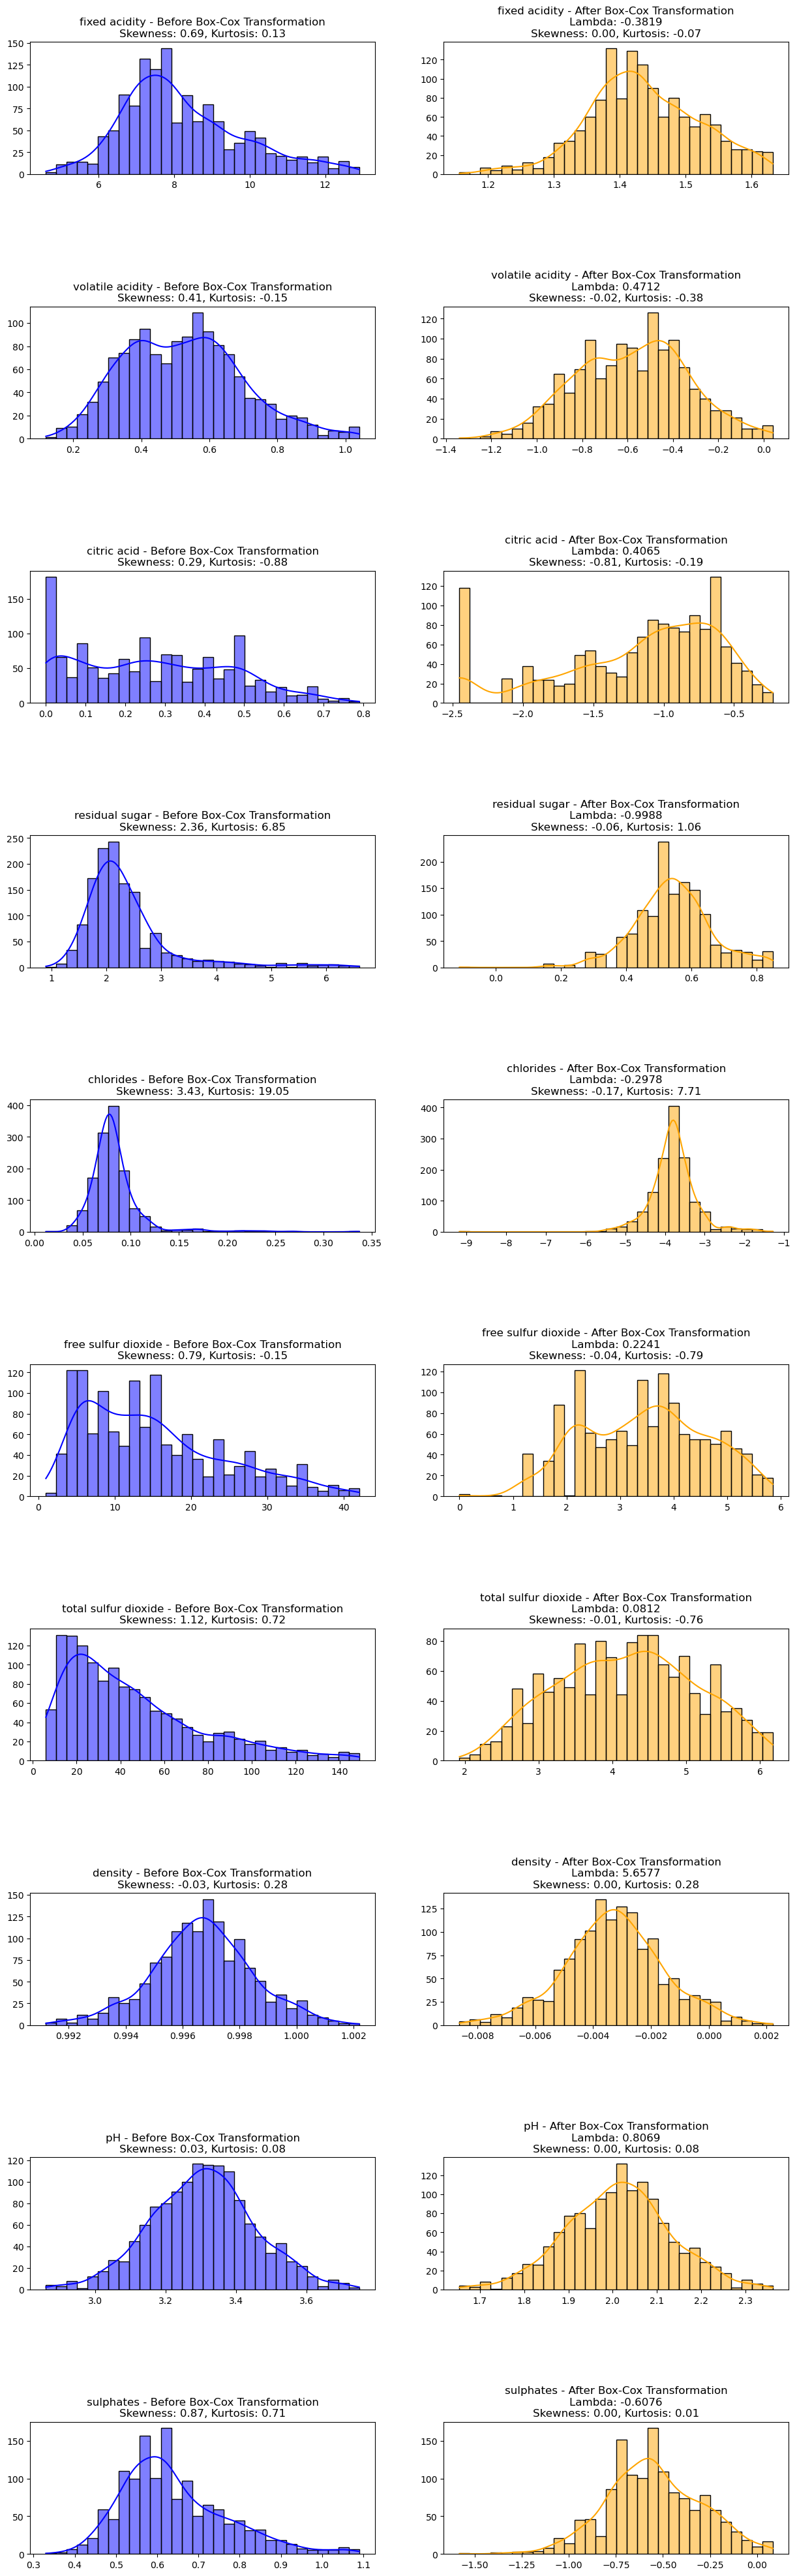

In [26]:
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

# 'citric acid' 열만 1을 더한 후 Box-Cox 변환 수행
df2_A_boxcox = pd.DataFrame()
lambda_values = []

for column in df2_A.columns:
    # 'citric acid' 열인 경우에만 1을 더하고 Box-Cox 변환 
    if column == 'citric acid':
        transformed_data, lambda_value = boxcox(df2_A[column] + 1e-6)
    else:
        transformed_data, lambda_value = boxcox(df2_A[column])
    
    # 제외할 열인 'alcohol'은 변환하지 않음
    if column != 'alcohol':
        df2_A_boxcox[column] = transformed_data
        lambda_values.append(lambda_value)

# 시각화를 위해 변환 후의 데이터프레임 생성
df2_A_boxcox.columns = [col for col in df2_A.columns if col != 'alcohol']

# 시각화
fig, axes = plt.subplots(len(df2_A_boxcox.columns), 2, figsize=(15, 5 * len(df2_A_boxcox.columns)))
fig.subplots_adjust(hspace=1.0)

# 각 변수에 대한 히스토그램 그리기
for i, column in enumerate(df2_A_boxcox.columns):
    # Box-Cox 변환 전
    sns.histplot(df2_A[df2_A_boxcox.columns[i]], bins=30, kde=True, color='blue', ax=axes[i, 0])
    axes[i, 0].set_title(f"{column} - Before Box-Cox Transformation\nSkewness: {skewness_result_before[column]:.2f}, Kurtosis: {kurtosis_result_before[column]:.2f}")
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('')
    
    # Box-Cox 변환 후
    sns.histplot(df2_A_boxcox[column], bins=30, kde=True, color='orange', ax=axes[i, 1])
    axes[i, 1].set_title(f"{column} - After Box-Cox Transformation\nLambda: {lambda_values[i]:.4f}\nSkewness: {df2_A_boxcox[column].skew():.2f}, Kurtosis: {df2_A_boxcox[column].kurtosis():.2f}")
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')

plt.show()


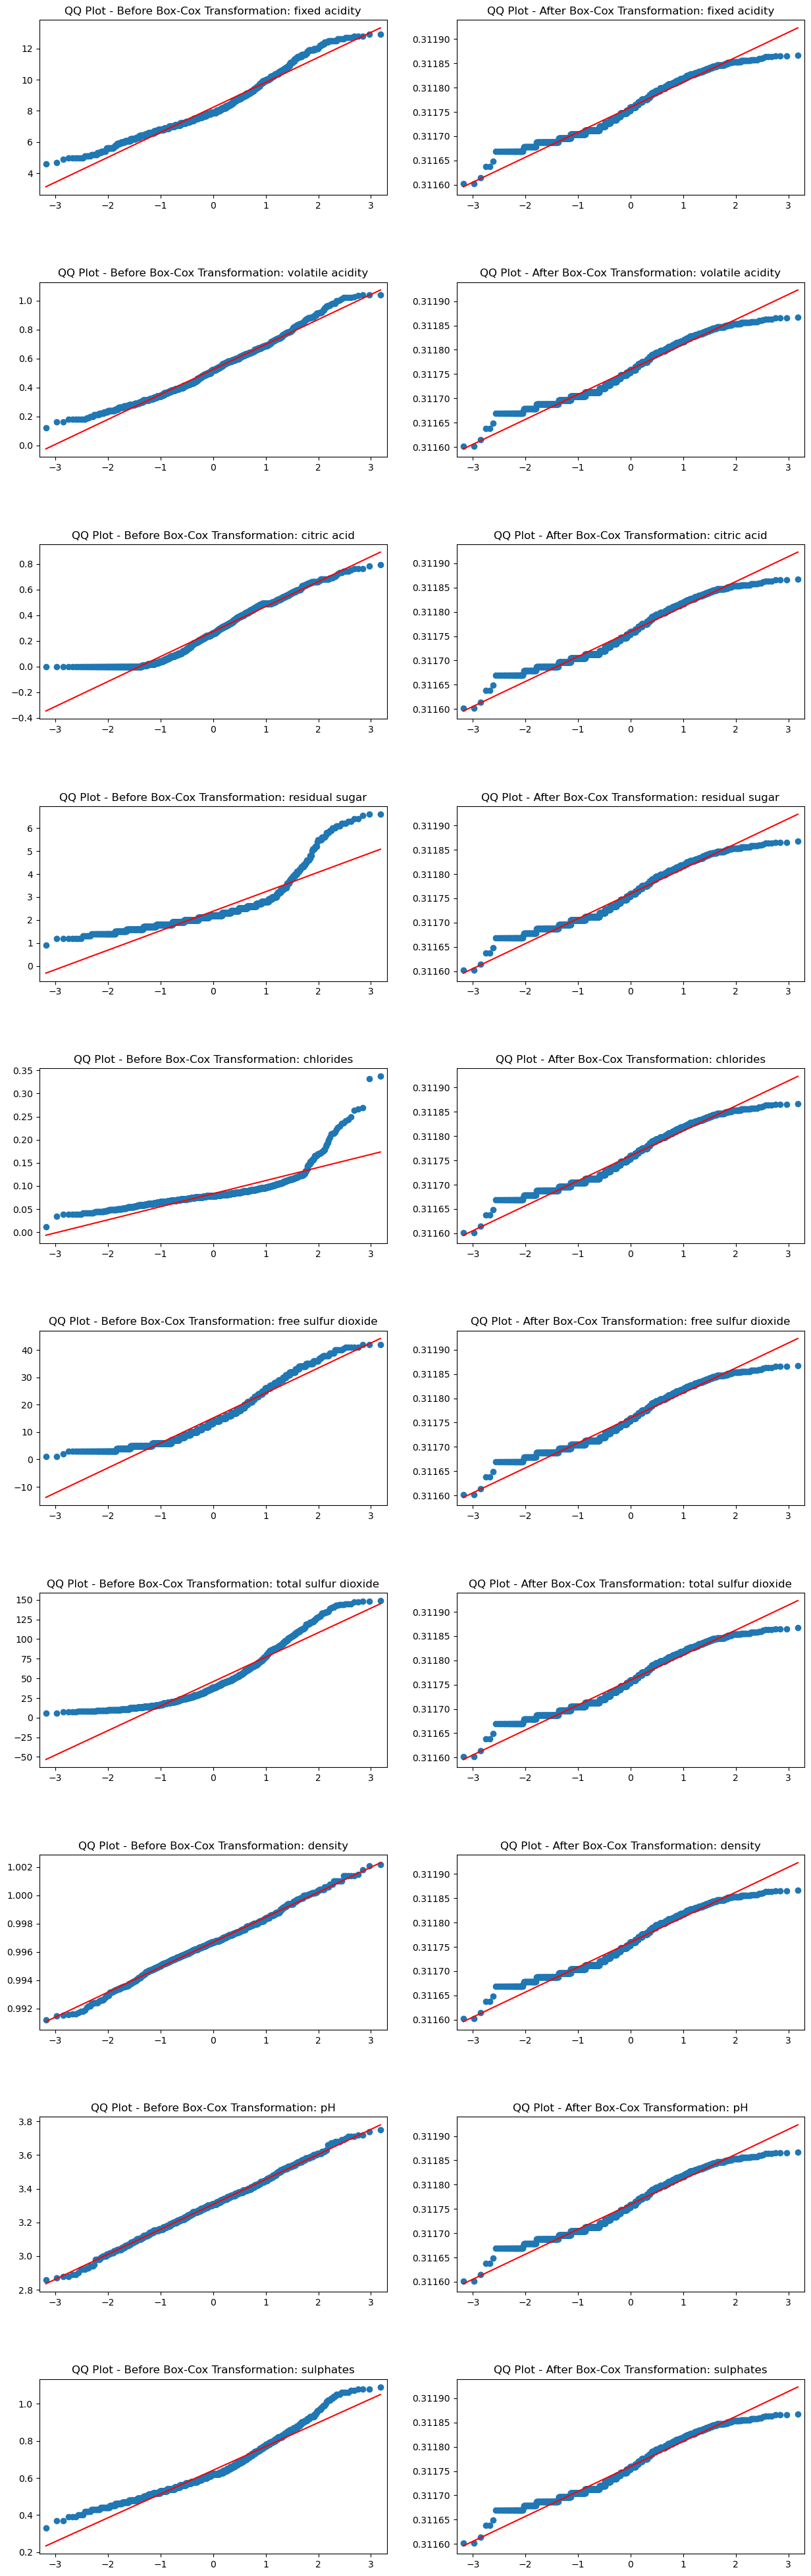

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Box-Cox 변환 후의 데이터프레임에 대한 QQ plot 그리기
fig, axes = plt.subplots(len(df2_A_boxcox.columns), 2, figsize=(15, 5 * len(df2_A_boxcox.columns)))
fig.subplots_adjust(hspace=0.5)

# 각 변수에 대한 QQ plot 그리기
for i, column in enumerate(df2_A_boxcox.columns):
    # 'citric acid' 열인 경우에만 1을 더하고 Box-Cox 변환 
    if column == 'citric acid':
        sm.qqplot(df2_A[column] + 1e-6, line='s', ax=axes[i, 0])
    else:
        sm.qqplot(df2_A[column], line='s', ax=axes[i, 0])
         # 제외할 열인 'alcohol'은 변환하지 않음
    if column != 'alcohol':
        df2_A_boxcox[column] = transformed_data
        lambda_values.append(lambda_value)   
    
        
    axes[i, 0].set_title(f"QQ Plot - Before Box-Cox Transformation: {column}")
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('')

    # Box-Cox 변환 후
    sm.qqplot(df2_A_boxcox[column], line='s', ax=axes[i, 1])
    axes[i, 1].set_title(f"QQ Plot - After Box-Cox Transformation: {column}")
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')

plt.show()


In [32]:
from scipy.stats import shapiro
import numpy as np

# 'citric acid' 열만 1을 더한 후 Box-Cox 변환 수행
df2_A_boxcox = pd.DataFrame()
lambda_values = []

for column in df2_A.columns:
    # 'citric acid'와 'alcohol' 열인 경우에만 1e-6을 더하고 Box-Cox 변환
    if column in ['citric acid', 'alcohol']:
        transformed_data, lambda_value = boxcox(df2_A[column] + 1e-6)
    else:
        transformed_data, lambda_value = boxcox(df2_A[column])

    # 'alcohol' 열 제외
    if column != 'alcohol':
        df2_A_boxcox[column] = transformed_data
        lambda_values.append(lambda_value)

# Shapiro-Wilk 정규성 검정 수행
for column in df2_A_boxcox.columns:
    _, p_before = shapiro(df2_A[column])  # 'alcohol' 열 제외
    _, p_after = shapiro(df2_A_boxcox[column])

    print(f"{column}:")
    print(f"  - Before Box-Cox Transformation: p-value = {p_before:.4f}")
    print(f"  - After Box-Cox Transformation: p-value = {p_after:.4f}")
    print()


fixed acidity:
  - Before Box-Cox Transformation: p-value = 0.0000
  - After Box-Cox Transformation: p-value = 0.0000

volatile acidity:
  - Before Box-Cox Transformation: p-value = 0.0000
  - After Box-Cox Transformation: p-value = 0.0005

citric acid:
  - Before Box-Cox Transformation: p-value = 0.0000
  - After Box-Cox Transformation: p-value = 0.0000

residual sugar:
  - Before Box-Cox Transformation: p-value = 0.0000
  - After Box-Cox Transformation: p-value = 0.0000

chlorides:
  - Before Box-Cox Transformation: p-value = 0.0000
  - After Box-Cox Transformation: p-value = 0.0000

free sulfur dioxide:
  - Before Box-Cox Transformation: p-value = 0.0000
  - After Box-Cox Transformation: p-value = 0.0000

total sulfur dioxide:
  - Before Box-Cox Transformation: p-value = 0.0000
  - After Box-Cox Transformation: p-value = 0.0000

density:
  - Before Box-Cox Transformation: p-value = 0.0012
  - After Box-Cox Transformation: p-value = 0.0014

pH:
  - Before Box-Cox Transformation: p-va

# 3.2 로그 변환 (alcohol)

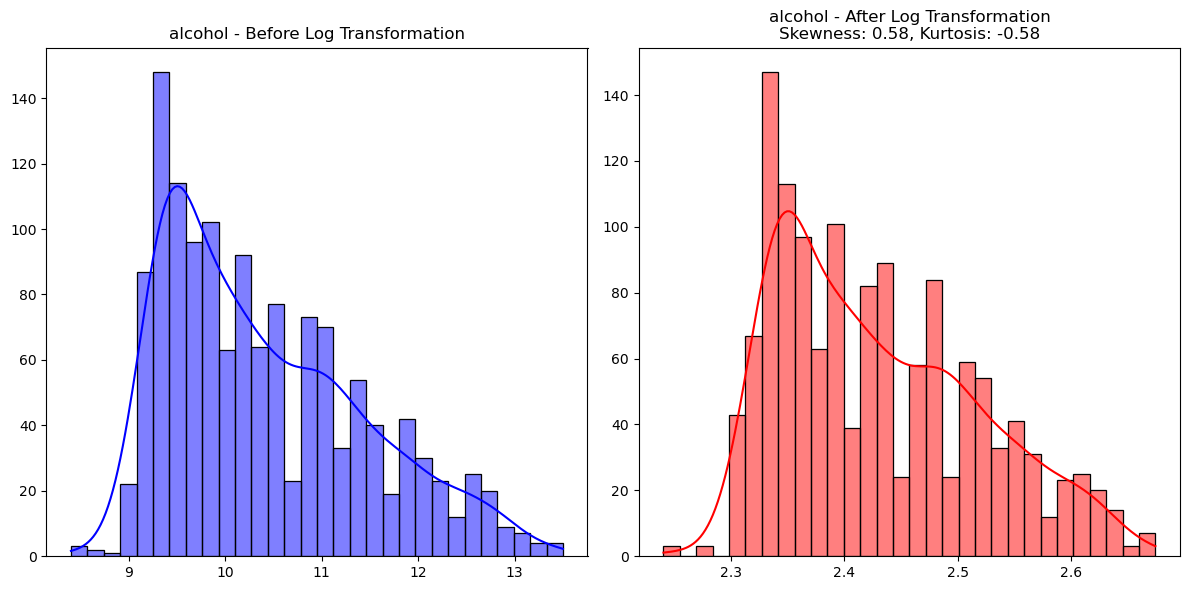

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 선택한 열
column_name = 'alcohol'

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 원본 데이터
plt.subplot(1, 2, 1)
sns.histplot(df2_A[column_name], bins=30, kde=True, color='blue')
plt.title(f"{column_name} - Before Log Transformation")
plt.xlabel('')
plt.ylabel('')

# 로그 변환 후
plt.subplot(1, 2, 2)
sns.histplot(np.log(df2_A[column_name] + 1), bins=30, kde=True, color='red')
plt.title(f"{column_name} - After Log Transformation\nSkewness: {pd.Series(np.log(df2_A[column_name])).skew():.2f}, Kurtosis: {pd.Series(np.log(df2_A[column_name])).kurtosis():.2f}")
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()  # 서브플롯 간 간격 조절
plt.show()


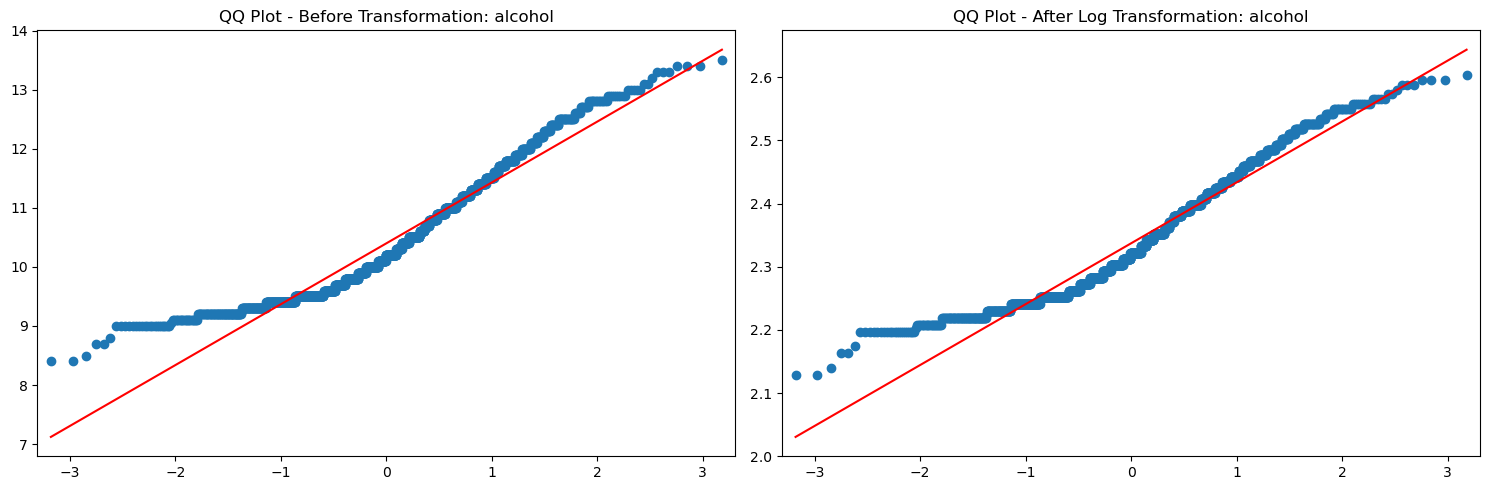

In [36]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 선택한 열
column_name = 'alcohol'

# 로그 변환 전의 데이터
transformed_data_log = df2_A[column_name].apply(lambda x: np.log(x))  # 로그 변환

# QQ plot 그리기
plt.figure(figsize=(15, 5))

# 변환 전 QQ plot
ax1 = plt.subplot(1, 2, 1)
sm.qqplot(df2_A[column_name], line='s', ax=ax1)
ax1.set_title(f"QQ Plot - Before Transformation: {column_name}")
ax1.set_xlabel('')
ax1.set_ylabel('')

# 로그 변환 후 QQ plot
ax2 = plt.subplot(1, 2, 2)
sm.qqplot(transformed_data_log, line='s', ax=ax2)
ax2.set_title(f"QQ Plot - After Log Transformation: {column_name}")
ax2.set_xlabel('')
ax2.set_ylabel('')

# 겹치는 축 제거
plt.tight_layout()
plt.show()



In [38]:
from scipy.stats import shapiro

# 'volatile acidity' 선택
column_name = 'alcohol'

# 로그 변환
transformed_data_log = df2_A[column_name].apply(lambda x: np.log(x))  # 로그 변환

# Shapiro-Wilk 정규성 검정
_, p_before = shapiro(df2_A[column_name])
_, p_log = shapiro(transformed_data_log)

# 결과 출력
print(f"Shapiro-Wilk 정규성 검정 결과 - {column_name}:")
print(f"  - Before Transformation: p-value = {p_before:.4f}")
print(f"  - After Log Transformation: p-value = {p_log:.4f}")


Shapiro-Wilk 정규성 검정 결과 - alcohol:
  - Before Transformation: p-value = 0.0000
  - After Log Transformation: p-value = 0.0000


# df3

In [72]:
# df2_A_boxcox 처리
column_name_boxcox = 'alcohol'
if column_name_boxcox in df2_A_boxcox.columns:
    df2_A_boxcox_processed = df2_A_boxcox.drop(column_name_boxcox, axis=1)
else:
    df2_A_boxcox_processed = df2_A_boxcox.copy()

# df2_A_log 처리
column_name_log = 'alcohol'
if column_name_log in df2_A_log.columns:
    df2_A_log_processed = df2_A_log[[column_name_log]]
else:
    df2_A_log_processed = pd.DataFrame()

# 인덱스 초기화
df2_A_boxcox_processed.reset_index(drop=True, inplace=True)
df2_A_log_processed.reset_index(drop=True, inplace=True)

# 두 데이터프레임을 한 프레임에 합치기
df3 = pd.concat([df2_A_boxcox_processed, df2_A_log_processed], axis=1)

# 결과 출력
print("df2_A_boxcox_processed:")
print(df2_A_boxcox_processed)

print("\ndf2_A_log_processed:")
print(df2_A_log_processed)

print("\nCombined DataFrame:")
print(df3)


df2_A_boxcox_processed:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          1.399216         -0.328313    -2.450893        0.473852  -3.876079   
1          1.423483         -0.124059    -2.450893        0.615691  -3.348573   
2          1.423483         -0.257433    -1.795170        0.565468  -3.475956   
3          1.577684         -0.957323    -0.516549        0.473852  -3.904672   
4          1.399216         -0.377368    -2.450893        0.444590  -3.904672   
...             ...               ...          ...             ...        ...   
1354       1.359203         -0.428022    -1.578828        0.473852  -4.119721   
1355       1.313988         -0.453997    -1.578828        0.500190  -3.520836   
1356       1.289046         -0.521011    -1.495172        0.545686  -4.328292   
1357       1.289046         -0.396168    -1.420955        0.500190  -3.904672   
1358       1.297551         -0.900092    -0.650147        0.722675  -4.152787   

   

In [73]:
df3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.399216,-0.328313,-2.450893,0.473852,-3.876079,3.174735,4.083026,-0.002189,2.174033,-0.695086,2.341806
1,1.423483,-0.124059,-2.450893,0.615691,-3.348573,4.717221,5.011571,-0.003176,1.928639,-0.434596,2.379546
2,1.423483,-0.257433,-1.795170,0.565468,-3.475956,3.724388,4.710731,-0.002979,1.976481,-0.492421,2.379546
3,1.577684,-0.957323,-0.516549,0.473852,-3.904672,3.957247,4.857015,-0.001991,1.896649,-0.645703,2.379546
4,1.399216,-0.377368,-2.450893,0.444590,-3.904672,3.466036,4.300856,-0.002189,2.174033,-0.695086,2.341806
...,...,...,...,...,...,...,...,...,...,...,...
1354,1.359203,-0.428022,-1.578828,0.473852,-4.119721,4.953315,4.231795,-0.003462,2.103238,-0.210912,2.351375
1355,1.313988,-0.453997,-1.578828,0.500190,-3.520836,5.239301,4.429948,-0.005040,2.126876,-0.645703,2.442347
1356,1.289046,-0.521011,-1.495172,0.545686,-4.328292,5.679029,4.631894,-0.004825,2.181878,-0.298645,2.501436
1357,1.289046,-0.396168,-1.420955,0.500190,-3.904672,5.239301,4.429948,-0.004482,2.221035,-0.380733,2.415914


# 데이터 표준화

In [78]:
# @title 데이터 표준화
import pandas as pd
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터 표준화
standardized_data = scaler.fit_transform(df3)

# 표준화된 데이터 출력
df4 = pd.DataFrame(standardized_data, columns=df3.columns)
print(df4)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.437482          1.020735    -2.214040       -0.585258  -0.149501   
1         -0.152255          1.854572    -2.214040        0.614257   0.771114   
2         -0.152255          1.310093    -1.078987        0.189530   0.548802   
3          1.660208         -1.547101     1.134304       -0.585258  -0.199401   
4         -0.437482          0.820477    -2.214040       -0.832723  -0.199401   
...             ...               ...          ...             ...        ...   
1354      -0.907795          0.613692    -0.704499       -0.585258  -0.574709   
1355      -1.439240          0.507651    -0.704499       -0.362525   0.470478   
1356      -1.732413          0.234074    -0.559690        0.022231  -0.938711   
1357      -1.732413          0.743731    -0.431221       -0.362525  -0.199401   
1358      -1.632442         -1.313464     0.903046        1.519010  -0.632417   

      free sulfur dioxide  

In [80]:
df4.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03
mean,8.783751e-16,2.091369e-17,6.274108e-17,3.973602e-16,2.091369e-17,-2.614212e-16,-2.300506e-16,-4.182739e-17,-1.683552e-15,-2.823349e-16,-5.437560e-16
std,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00
min,-3.290530e+00,-3.112528e+00,-2.214040e+00,-5.532164e+00,-9.400876e+00,-3.046628e+00,-2.430466e+00,-3.076863e+00,-3.052147e+00,-4.100207e+00,-2.145241e+00
25%,-6.657714e-01,-7.434765e-01,-6.297019e-01,-5.852578e-01,-4.625309e-01,-9.088136e-01,-7.347929e-01,-6.226964e-01,-6.529252e-01,-6.817884e-01,-8.886306e-01
50%,-8.409121e-02,6.357446e-02,2.329519e-01,2.223089e-02,-4.772193e-03,1.076091e-01,3.370255e-02,-1.211992e-03,2.308309e-02,-2.237016e-02,-1.557940e-01
75%,6.507082e-01,7.049898e-01,7.917964e-01,6.142572e-01,4.704778e-01,7.796053e-01,7.516160e-01,6.234754e-01,6.281232e-01,6.680613e-01,7.218551e-01
max,2.302866e+00,2.522628e+00,1.639356e+00,2.588849e+00,4.373350e+00,2.079707e+00,2.110982e+00,3.154514e+00,2.952568e+00,2.512299e+00,2.776470e+00
